## Wholesale Customer Segmentation problem using Hierarchical Clustering
Based on a tutorial by Pulkit Sharma: __A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python__
https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

* This example is based on a a wholesale customer dataset hosted on the UCI Machine Learning repository. 
* The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [5]:
data = pd.read_csv('wholesale_customers.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will use Hierarchical Clustering for this problem.

<Axes: xlabel='Fresh', ylabel='Count'>

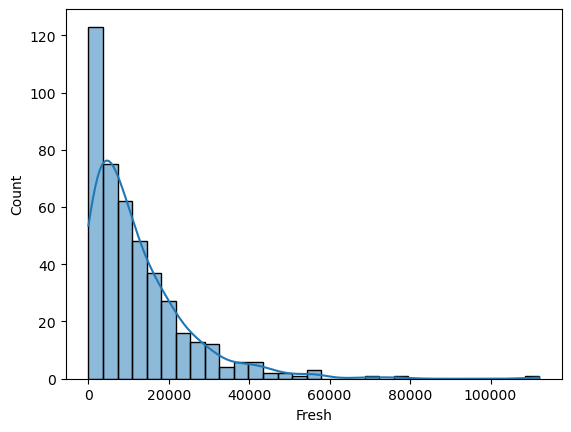

In [7]:
sns.histplot(data=data['Fresh'], kde=True)

<Axes: xlabel='Milk', ylabel='Count'>

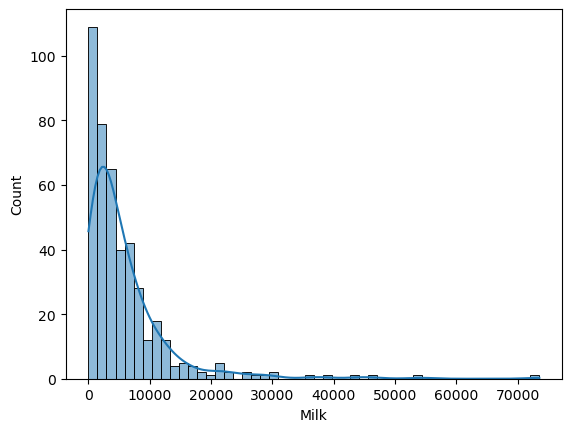

In [9]:
sns.histplot(data=data['Milk'], kde=True)

<Axes: ylabel='Fresh'>

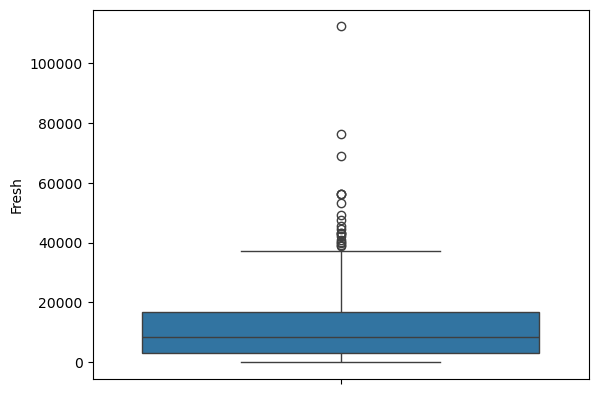

In [10]:
sns.boxplot(data=data['Fresh'])

### Normalizing Data
* Before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. 
* If the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

#### Why do we need to normalize our features?
Normalizing data scales in machine learning applications serves several important purposes:

1. Improved Model Performance
    * Consistency Across Features: Many machine learning algorithms, particularly those based on gradient descent (e.g., linear regression, logistic regression, neural networks), perform better when the features have similar scales. This is because consistent feature scales ensure that the algorithm updates weights uniformly across all features.
    * Faster Convergence: When features are normalized, the optimization process often converges more quickly because it doesn't get "stuck" in narrow, elongated optimization landscapes.
2. Enhanced Interpretability
    * Coefficient Interpretation: In models like linear regression, normalized data makes it easier to compare the coefficients directly since each feature is on a comparable scale.
    * Distance-Based Algorithms: For algorithms that rely on distance calculations (e.g., k-nearest neighbors, support vector machines), normalization ensures that no single feature disproportionately influences the results due to its scale.
3. Preventing Numerical Instability
    * Avoiding Large Numerical Values: Extremely large or small feature values can lead to numerical instability in some algorithms, potentially causing computational issues or inaccuracies. Normalizing data helps maintain numerical stability.
4. Improved Training Efficiency
    * Balanced Gradient Magnitudes: In neural networks, normalized data ensures that the gradients are of similar magnitudes, preventing issues where some weights update much faster than others, leading to more efficient training.
5. Equal Contribution of Features
    * Fair Weighting: Normalization ensures that each feature contributes equally to the model’s predictions. Without normalization, features with larger scales could dominate the learning process, leading to biased results.

#### Common Normalization Techniques
* Min-Max Scaling: Rescales the data to a fixed range, usually [0, 1].
* Z-score Standardization: Transforms the data to have a mean of 0 and a standard deviation of 1.
* Robust Scaling: Uses the median and interquartile range, which is useful for data with outliers.

In [13]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


We can see that the scale of all the variables is almost similar. 

In [16]:
data_scaled.shape

(440, 8)

### Dendrogram

#### Importance of Dendrograms

* Visualization of Cluster Formation
* Hierarchical Structure: Dendrograms provide a clear visualization of how clusters are formed and merged at each step of the hierarchical clustering process. This helps in understanding the nested grouping of data points.
* Tree-Like Representation: They represent the data in a tree-like structure, which illustrates the relationships between different clusters and sub-clusters.

#### Determining the Optimal Number of Clusters

* Cutting the Dendrogram: By analyzing the dendrogram, you can decide where to "cut" the tree to form a specific number of clusters. The height at which you cut the dendrogram corresponds to a threshold distance for merging clusters.
* Elbow Method Analogy: The point at which the vertical distances between merges increase significantly (an "elbow" in the plot) often indicates a natural separation in the data, suggesting an appropriate number of clusters.

#### Identifying Outliers and Anomalies

* Isolated Branches: Points or small groups of points that are merged at high levels of the dendrogram (i.e., far from other clusters) may be outliers or anomalies.

#### Understanding Cluster Composition

* Merging History: Dendrograms allow you to trace back the merging history of clusters, providing insights into the composition and hierarchical relationships of clusters.

#### Usage of Dendrograms in Hierarchical Clustering

* Constructing the Dendrogram
    * Agglomerative Clustering: Start with each data point as its own cluster. Iteratively merge the closest pair of clusters until all points are in a single cluster. The distance between clusters can be defined in various ways (e.g., single linkage, complete linkage, average linkage).
    * Divisive Clustering: Start with all data points in a single cluster and recursively split them into smaller clusters.

#### Interpreting the Dendrogram
* X-axis (Data Points): Each leaf represents an individual data point or a group of data points.
* Y-axis (Distance or Similarity): The height at which clusters are merged represents the distance or dissimilarity between them. Lower heights indicate more similar clusters.
* Branches: The branches represent clusters formed at various stages of the hierarchical process.

#### Cutting the Dendrogram

* Selecting the Number of Clusters: Determine a horizontal cut line that best represents the desired number of clusters or captures significant cluster separations.
* Threshold Distance: Choose a specific distance threshold where clusters should no longer be merged, effectively determining the final set of clusters.

#### Drawing Dendrogram
Let’s  draw the dendrogram to help us decide the number of clusters for this particular problem

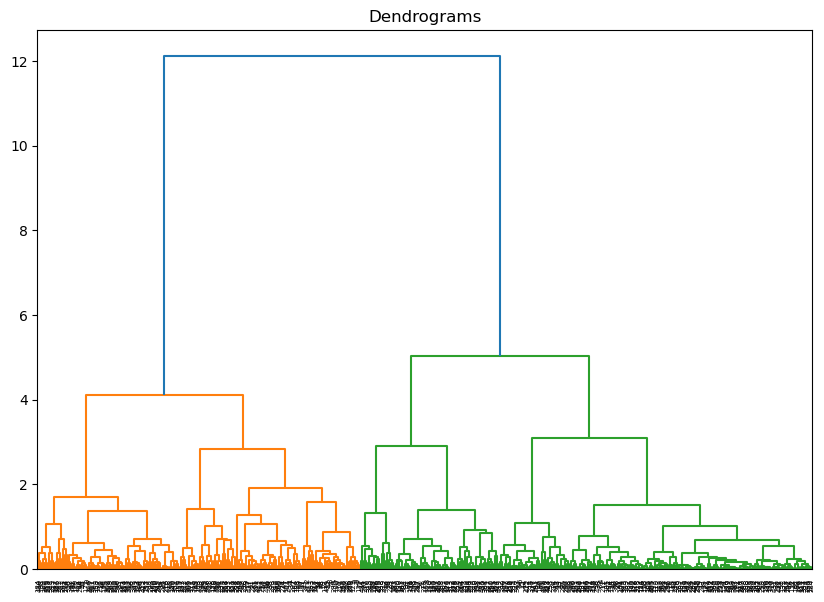

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

* The x-axis contains the samples and y-axis represents the distance between these samples. 
* The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram

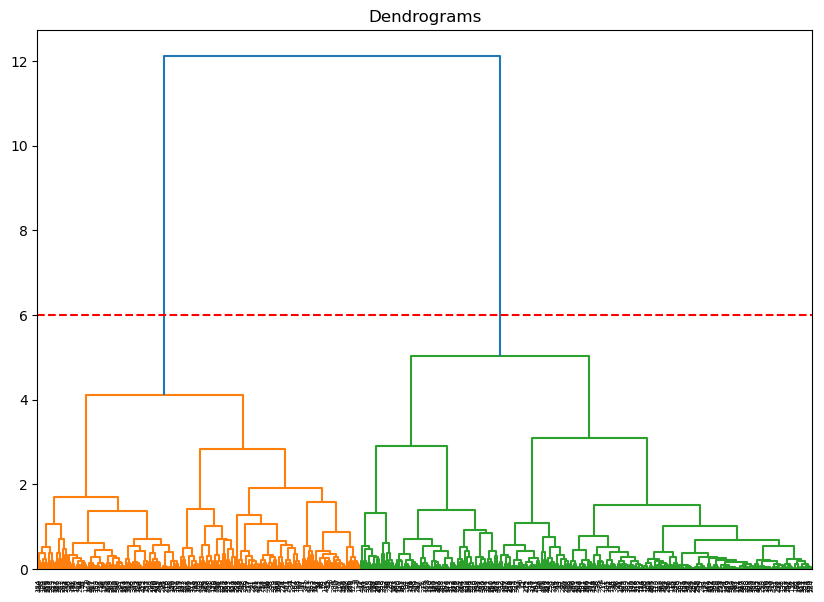

In [22]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')


We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

* We can see the values of 0s and 1s in the output since we defined 2 clusters. 
* 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. 

#### Visualizing the two clusters:

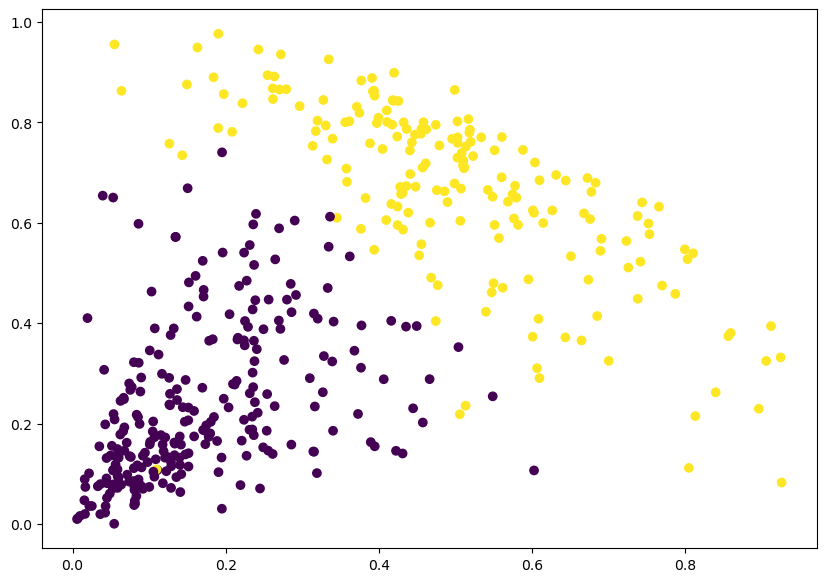

In [32]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 